In [74]:
import feyn

ql = feyn.QLattice(random_seed=42)

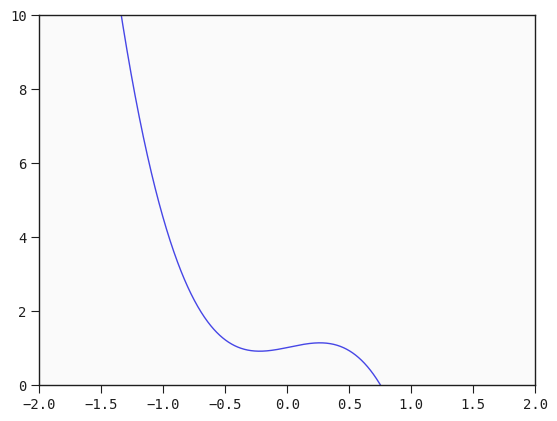

In [75]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-1.5, 1.5, 1000)
y = 2**(X) - 4*X**3

plt.plot(X, y, linewidth=1)
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

In [76]:
import pandas as pd

data = np.c_[X, y]
data = pd.DataFrame(data, columns=["x", "y"])

In [77]:
data

,x,y
0,-1.500000,13.853553
1,-1.496997,13.773371
2,-1.493994,13.693515
3,-1.490991,13.613983
4,-1.487988,13.534775
...,...,...
995,1.487988,-10.373291
996,1.490991,-10.447395
997,1.493994,-10.521810
998,1.496997,-10.596535


In [78]:
models = ql.auto_run(data, output_name='y')

In [79]:
for model in models:
    sympy_model = model.sympify(signif=3)
    display(sympy_model.as_expr())

-5.59*(0.467 - 0.814*x)*log(exp(-0.86*(x + 0.261)**2 - 2.0*exp(-4.0*tanh(0.449*x + 2.24)**2))) + 0.732

11.7*(0.0327 - 0.711*x)*(0.525 - 0.00132*x)*(0.824*x + (0.988 - 0.6*x)*(-1.5*x - 1.07) + 0.901) + 1.03

-10.3*(-0.475*x - 0.011)*(0.781*x - 0.361)*(-1.03*x + exp(-6.93*(1 - 0.5*x)**2 - 2.68*(0.142*x + 1)**2) - 0.389) + 0.983

6.08*(-0.642*x - 0.304)*(x - 0.265)**2 + 1.11 + 22.9*exp(-8.04*(-0.154*x - 1)**2)

8.37*(0.265 - x)**2*(-0.471*x - 0.218) + 1.12

-8.14*(-0.98*x - 0.341)*(-0.719*x - 0.046)*(0.688*x - 0.33) + 0.955

-10.1*(0.795 - 0.00205*x)*(0.779*x + 0.0754)*(0.789*x - 0.384)*(0.797*x + 0.262) + 0.939

3.24*(0.732 - 0.845*x)*(-0.816*x + 1.44*(-x - 0.683)**2 + 0.0743) - 0.773

-6.34*(0.0265 - 0.706*x)*(0.355*x + 0.125)*(-2.49*x + 0.973 + 1/((1.42*x + 6.58)*(1.48*x - 0.0561))) + 0.958

-5.93*(1.08*x + 0.39)*(-0.569*x + (0.551 - 1.0*x)*(-0.618*x - 0.643) + 0.342) + 0.966

In [80]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

sympy_model = models[0].sympify(signif=3)
x_symbol = smp.symbols("x")

f_qlattice = lambdify([x_symbol], sympy_model)

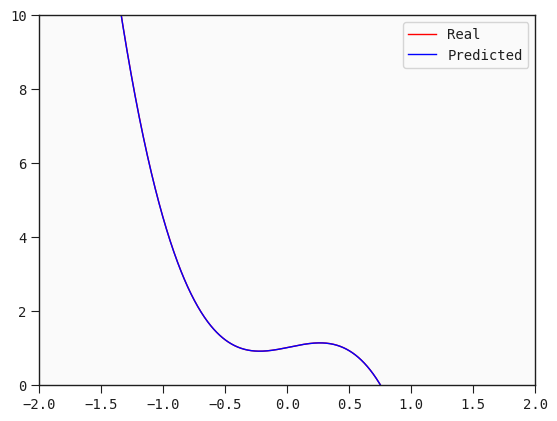

In [81]:
y_model = f_qlattice(X)

plt.plot(X, y, linewidth=1, label="Real", c="red")
plt.plot(X, y_model, linewidth=1, c="blue", label="Predicted")
plt.legend()
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

In [82]:
import sys
sys.path.insert(1, r"D:\Program Files (x86)\TuringBot")

import turingbot as tb
import time

path = r'D:\Program Files (x86)\TuringBot\TuringBot.exe' 
# input_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data\saida_fixed.csv' 
# D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\TuringBot_tests\Data
config_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\Qlattice_tests\settings.cfg' 

In [83]:
input_file = r'D:\Documents\Coding\Repositorios\Meus Repositórios\Symbolic-Regression\Phase Three - SR\qlattice_tests\output_test_1.csv' 

data.to_csv(input_file, index=False)

In [109]:
sim = tb.simulation()

sim.start_process(path, input_file, config="settings.cfg")

time.sleep(900)

sim.refresh_functions()

In [110]:
print(*sim.functions, sep='\n')

[1, 1.04791, '12.01372096376751']
[3, 0.682821, '-8.436774180768142*x']
[5, 0.0288965, '(-24.15415808633913)*(0.9290468562138662+x)']
[8, 0.00798517, '-1.314076249904324+pow(0.1630889994485462,x)']
[9, 0.00157921, '0.5116227736097174+((-3.952096933356512)*x*x*x)']
[10, 0.000360928, 'pow((x-1.220334234145587)*x,1.86927160039243)']
[12, 0.000289526, 'pow((x-1.203649346316557)*x,1.874259214993128)+0.06229032437141264']
[16, 0.000268286, '0.9974787586683278*(pow((-0.001146954960632525+x-1.206882472628727)*x,1.874259214993128)+0.05536864841314368)']
[22, 0.000191731, '1.921431713938792*x*x*(0.07485166420647674+0.05186498989405794*x)+pow((x-1.200726522030472)*x,1.87957493812738)']
[24, 0.000171583, '2.097618535671018*(0.1184023909166049+x)*x*(0.07485544836768661+0.05186352456848416*x)+pow((x-1.200726522030472)*x,1.879575123829384)']
[26, 8.56872e-05, '(-1.75985606409414-x+2.094848197912459*x*x)*(0.07498000263618479+0.05193284819418107*x)+pow((x-1.200726522030472)*x,1.87957493812738)']


In [114]:
x = smp.symbols("x")

from sympy.parsing.sympy_parser import parse_expr

expr = parse_expr(sim.functions[10][2])
expr

(x*(x - 1.200726522030472))**1.87957493812738 + (0.05193284819418107*x + 0.07498000263618479)*(2.094848197912459*x**2 - x - 1.75985606409414)

<lambdifygenerated-27>:2: RuntimeWarning: invalid value encountered in power
  return (x*(x - 1.200726522030472))**1.87957493812738 + (0.05193284819418107*x + 0.07498000263618479)*(2.094848197912459*x**2 - x - 1.75985606409414)


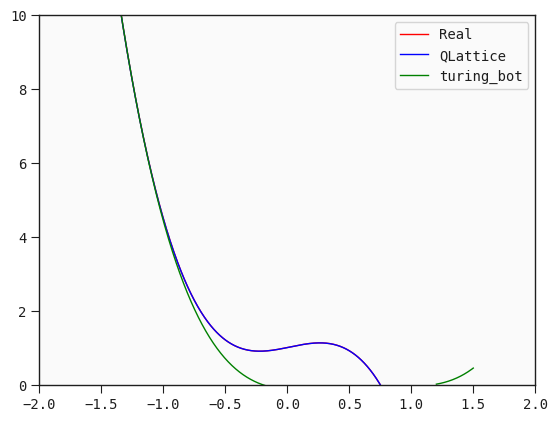

In [115]:
from sympy.utilities.lambdify import lambdify
f = lambdify([x], expr)

generated_y = f(np.array(data.x))

plt.plot(data.x, y, linewidth=1, label="Real", c="red")
plt.plot(data.x, y_model, linewidth=1, c="blue", label="QLattice")
plt.plot(data.x, generated_y, label="turing_bot", c="green", linewidth=1)
plt.legend()
plt.ylim(0, 10)
plt.xlim(-2, 2)
plt.show()

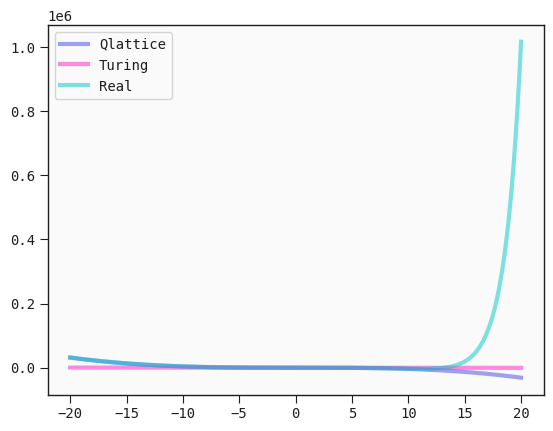

In [108]:
X = np.linspace(-20, 20, 1000)
y_qlattice = f_qlattice(X)
y_turing = f(X)
y_real = 2**(X) - 4*X**3

plt.plot(X, y_qlattice, label="Qlattice", alpha=0.5)
plt.plot(X, y_turing, label="Turing", alpha=0.5)
plt.plot(X, y_real, label="Real", alpha=0.5)
plt.legend()
plt.show()